In [1]:
import matplotlib
matplotlib.use('agg')
import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets
import time

PATCH_PATH = ('ipmlb') # image, prob, binary, largeborder


/home/d/GP/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: TITAN X (Pascal) (CNMeM is disabled, cuDNN not available)
/home/d/GP/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different f

In [2]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:

t0=time.time()
X_train, y_train, X_test, y_test = gp.Patch.load_rgba(PATCH_PATH)

print 'Training patches', y_train.shape[0]
print 'Test patches', y_test.shape[0]

# X_train, y_train, X_test, y_test = gp.Patch.load_rgb(PATCH_PATH)
# X_train = X_train[:,:-1,:,:]
# X_test = X_test[:,:-1,:,:]

print time.time()-t0

Loaded /home/d/patches//ipmlb/ in 0.00167012214661 seconds.
Training patches 225520
Test patches 17560
24.8278129101


In [4]:
t0 =time.time()
X_train = np.delete(X_train, [0,1] , axis=1) # delete image + prob
print time.time() - t0

4.05742502213


In [5]:
X_train.shape

(225520, 2, 75, 75)

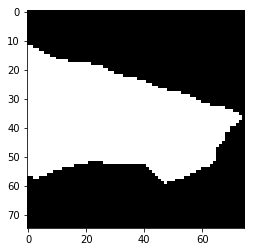

In [6]:
imshow(X_train[0][0], cmap='gray')

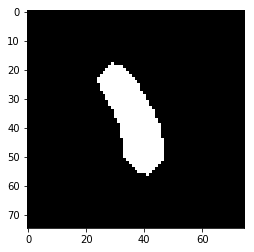

In [7]:
imshow(X_train[0][1], cmap='gray')

In [8]:
t0 =time.time()
X_test = np.delete(X_test, [0,1] , axis=1) # delete image + binary
print time.time() - t0

0.328902006149


In [9]:

cnn = nets.RGNetPlus()

cnn = cnn.fit(X_train, y_train)

test_accuracy = cnn.score(X_test, y_test)

print test_accuracy

# store CNN
sys.setrecursionlimit(1000000000)
with open(os.path.expanduser('~/Projects/gp/nets/MLB_FULL.p'), 'wb') as f:
  pickle.dump(cnn, f, -1)

CNN configuration: 
    Our CNN with image, prob, merged_array as RGB.

    This includes dropout. This also includes more layers.
    
# Neural Network with 170322 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     2x75x75
  1  conv1     64x73x73
  2  pool1     64x36x36
  3  dropout1  64x36x36
  4  conv2     48x34x34
  5  pool2     48x17x17
  6  dropout2  48x17x17
  7  conv3     48x15x15
  8  pool3     48x7x7
  9  dropout3  48x7x7
 10  conv4     48x5x5
 11  pool4     48x2x2
 12  dropout4  48x2x2
 13  hidden5   512
 14  dropout5  512
 15  output    2

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -------
      1     0.42371     0.37584    1.12737      0.84495  237.47s
      2     0.35352     0.34665    1.01980      0.85883  239.13s
      3     0.34643     0.34117    1.01542      0.86139  239.10s
      4     0.34250     0.33656    1.01764      0.86382  239.07s
    

In [10]:
sys.setrecursionlimit(1000000000)
with open(os.path.expanduser('~/Projects/gp/nets/MLB_FULL.p'), 'wb') as f:
  pickle.dump(cnn, f, -1)